In [35]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns = ["Pregnancies","Glucose","BP","SkinThickness","Insulin","BMI","DiabetesPredigree","Age","Outcome"]
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPredigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3> Tuning Batch Size and Number of Epochs </h3> 

Number of epochs is the number of times that the entire training dataset is shown to the network during training. 

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = (8,)))
    model.add(keras.layers.Dense(12, activation = 'relu'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    optim = keras.optimizers.Adam()
    model.compile(loss = "binary_crossentropy",optimizer = optim, metrics = ['accuracy'])
    return model

In [6]:
#fixing random seed
seed = 7
np.random.seed(seed)

In [8]:
df_1 = df.copy()

In [9]:
X_1 = df.iloc[:,0:8]
y_1 = df.iloc[:,8]

In [12]:
model_1 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose = 0)

In [13]:
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size, epochs = epochs)

In [23]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid, n_jobs = -1, cv = 3, return_train_score= True)
grid

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B183151B80>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100]},
             return_train_score=True)

In [24]:
grid_result = grid.fit(X_1,y_1)

In [39]:
grid_result.best_params_

{'batch_size': 40, 'epochs': 100}

In [25]:
grid_result.cv_results_

{'mean_fit_time': array([ 4.1145738 ,  7.42240167, 10.91776188,  2.87963867,  5.0262351 ,
         6.83406742,  2.63229609,  3.57843471,  4.9487733 ,  2.68549164,
         3.13129775,  3.82311241,  2.42052619,  2.83709049,  3.22538177,
         2.14692911,  2.1286428 ,  2.70842632]),
 'std_fit_time': array([0.17477021, 0.23725445, 0.57333579, 0.08044045, 0.1754351 ,
        0.10034101, 0.18336416, 0.21499963, 0.3782188 , 0.15860726,
        0.06089713, 0.28687774, 0.23372938, 0.3865662 , 0.2163144 ,
        0.07247621, 0.09155564, 0.02363394]),
 'mean_score_time': array([1.59507108, 1.13430142, 1.42286301, 0.77459518, 0.85471567,
        0.96475776, 0.73702995, 0.83443721, 0.80518508, 0.73204271,
        0.625995  , 0.66256531, 0.77625855, 0.67086585, 0.60338958,
        0.59042223, 0.55485034, 0.28557102]),
 'std_score_time': array([0.05834919, 0.04702149, 0.54050061, 0.04066945, 0.03638263,
        0.07048392, 0.01840921, 0.03030956, 0.11047962, 0.10600908,
        0.1506254 , 0.0766

In [26]:
#plotting effect of epoch and batch on test_score
parameters_used = grid_result.cv_results_["params"]
parameter_labels = ["batch_size : {} , epochs : {}".format(i["batch_size"],i["epochs"]) for i in parameters_used]
test_means = grid_result.cv_results_["mean_test_score"]
train_means = grid_result.cv_results_["mean_train_score"]

<ipython-input-38-5332734edcce>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_epoch_batch_train.set_xticklabels(parameter_labels, rotation = 45)


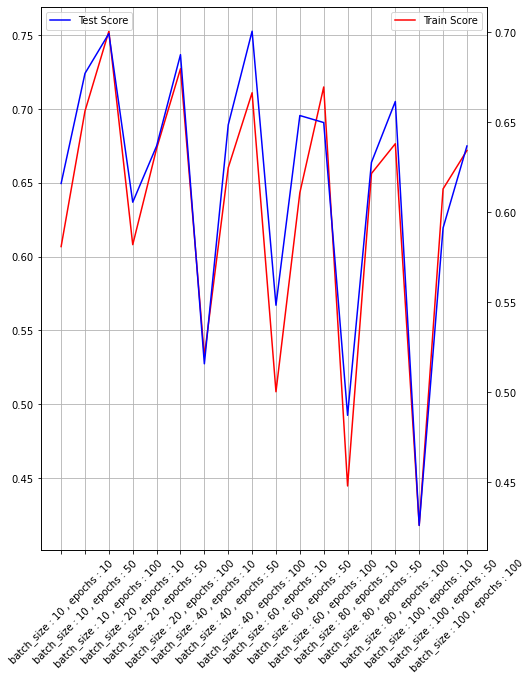

In [38]:
fig,ax_epoch_batch_train = plt.subplots(1,1,figsize = (8,10))
ax_epoch_batch_test = ax_epoch_batch_train.twinx()
sns.lineplot(x = parameter_labels, y = train_means, ax = ax_epoch_batch_train, label = "Train Score", color = 'r')
sns.lineplot(x = parameter_labels, y = test_means, ax = ax_epoch_batch_test, label = "Test Score", color = 'b')
ax_epoch_batch_train.set_xticklabels(parameter_labels, rotation = 45)
ax_epoch_batch_train.legend(loc  ="upper right")
ax_epoch_batch_test.legend(loc  ="upper left")
ax_epoch_batch_train.grid()

<h3> Tuning the Optimization Algorithm </h3> 

As we have found an optimal batch and epoch count, batch_size = 40, epochs = 10, now we optimize the optimization algorithm.

In [64]:
def create_model_optim(optimizer = "adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(8,)))
    model.add(keras.layers.Dense(12,activation = "relu"))
    model.add(keras.layers.Dense(1,activation = "sigmoid"))
    #binary_accuracy = keras.metrics.BinaryAccuracy()
    #precision = keras.metrics.Precision()
    #recall = keras.metrics.Recall()
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

In [65]:
#can pass batch_size and epochs to the wrapper directly. 
model_optim  = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_optim, batch_size = 40, epochs= 10, verbose = 2)

In [66]:
optimization_algo = {'optimizer' :("SGD","RMSProp","Adagrad", "Adam", "Nadam")}
grid_optim = GridSearchCV(estimator = model_optim, param_grid = optimization_algo, n_jobs = -1, cv=3, return_train_score=True)
optim_results = grid_optim.fit(X_1,y_1)

Epoch 1/10
20/20 - 1s - loss: 5.9844 - accuracy: 0.5677
Epoch 2/10
20/20 - 0s - loss: 0.7539 - accuracy: 0.6042
Epoch 3/10
20/20 - 0s - loss: 0.6724 - accuracy: 0.6510
Epoch 4/10
20/20 - 0s - loss: 0.6328 - accuracy: 0.6771
Epoch 5/10
20/20 - 0s - loss: 0.6357 - accuracy: 0.6615
Epoch 6/10
20/20 - 0s - loss: 0.6284 - accuracy: 0.6589
Epoch 7/10
20/20 - 0s - loss: 0.6203 - accuracy: 0.6784
Epoch 8/10
20/20 - 0s - loss: 0.6212 - accuracy: 0.6745
Epoch 9/10
20/20 - 0s - loss: 0.6386 - accuracy: 0.6771
Epoch 10/10
20/20 - 0s - loss: 0.6206 - accuracy: 0.6771


In [67]:
optim_results.cv_results_

{'mean_fit_time': array([2.36075703, 2.76468531, 1.67068982, 1.34706537, 1.98768401]),
 'std_fit_time': array([0.05180039, 0.14465951, 0.30271238, 0.00653314, 0.01472317]),
 'mean_score_time': array([0.56715123, 0.77458858, 0.49866668, 0.3527232 , 0.28723335]),
 'std_score_time': array([0.02869125, 0.05339466, 0.10741909, 0.01468862, 0.03463416]),
 'param_optimizer': masked_array(data=['SGD', 'RMSProp', 'Adagrad', 'Adam', 'Nadam'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'SGD'},
  {'optimizer': 'RMSProp'},
  {'optimizer': 'Adagrad'},
  {'optimizer': 'Adam'},
  {'optimizer': 'Nadam'}],
 'split0_test_score': array([0.6171875 , 0.6328125 , 0.484375  , 0.60546875, 0.61328125]),
 'split1_test_score': array([0.6953125 , 0.65625   , 0.34765625, 0.578125  , 0.6015625 ]),
 'split2_test_score': array([0.68359375, 0.53515625, 0.49609375, 0.55078125, 0.578125  ]),
 'mean_test_score': array([0.66536458, 0.

In [68]:
#plotting effect of epoch and batch on test_score
parameters_used = optim_results.cv_results_["params"]
parameter_labels = ["Optimizer : {}".format(i["optimizer"]) for i in parameters_used]
test_means = optim_results.cv_results_["mean_test_score"]
train_means = optim_results.cv_results_["mean_train_score"]

<ipython-input-69-22f62fd16692>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_optim_train.set_xticklabels(parameter_labels, rotation = 45)


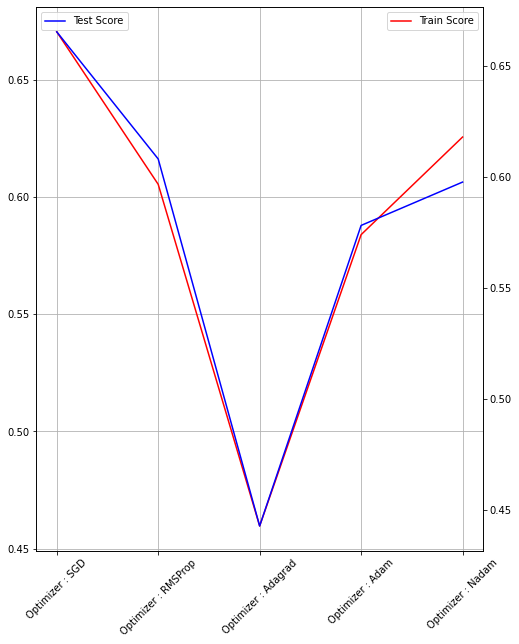

In [69]:
fig,ax_optim_train = plt.subplots(1,1,figsize = (8,10))
ax_optim_test = ax_optim_train.twinx()
sns.lineplot(x = parameter_labels, y = train_means, ax = ax_optim_train, label = "Train Score", color = 'r')
sns.lineplot(x = parameter_labels, y = test_means, ax = ax_optim_test, label = "Test Score", color = 'b')
ax_optim_train.set_xticklabels(parameter_labels, rotation = 45)
ax_optim_train.legend(loc  ="upper right")
ax_optim_test.legend(loc  ="upper left")
ax_optim_train.grid()

<h3> Tuning learning rate and Momentum </h3> 

The above shows that the best Optimizer for this case is SGD. Now we shall tune the learning rate and Momentum for this optimizer. 

In [74]:
def create_model_lrmo(lr = 0.01, momentum = 0.0):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(8,)))
    model.add(keras.layers.Dense(12,activation = "relu"))
    model.add(keras.layers.Dense(1,activation = "sigmoid"))
    optimizer = keras.optimizers.SGD(learning_rate=lr,momentum = momentum)
    #binary_accuracy = keras.metrics.BinaryAccuracy()
    #precision = keras.metrics.Precision()
    #recall = keras.metrics.Recall()
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

In [75]:
model_lr_mo  = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_lrmo, verbose = 2)

In [76]:
lr_mo = {'lr' :(0.001,0.01,0.1,0.2,0.3),
        'batch_size' : (10,20,40,60,80,100),
        'epochs' : (10,50,100),
        'momentum' : (0.0,0.2,0.4,0.6,0.8,0.9)}

grid_lr_mo = GridSearchCV(estimator = model_lr_mo, param_grid = lr_mo, n_jobs = -1, cv=3, return_train_score=True)
lr_mo_results = grid_lr_mo.fit(X_1,y_1)

Epoch 1/100
13/13 - 1s - loss: 9.8780 - accuracy: 0.5182
Epoch 2/100
13/13 - 0s - loss: 0.7235 - accuracy: 0.6068
Epoch 3/100
13/13 - 0s - loss: 0.6837 - accuracy: 0.6367
Epoch 4/100
13/13 - 0s - loss: 0.6657 - accuracy: 0.6523
Epoch 5/100
13/13 - 0s - loss: 0.6937 - accuracy: 0.6432
Epoch 6/100
13/13 - 0s - loss: 0.6556 - accuracy: 0.6497
Epoch 7/100
13/13 - 0s - loss: 0.6484 - accuracy: 0.6693
Epoch 8/100
13/13 - 0s - loss: 0.6451 - accuracy: 0.6536
Epoch 9/100
13/13 - 0s - loss: 0.6370 - accuracy: 0.6693
Epoch 10/100
13/13 - 0s - loss: 0.6331 - accuracy: 0.6784
Epoch 11/100
13/13 - 0s - loss: 0.6214 - accuracy: 0.6849
Epoch 12/100
13/13 - 0s - loss: 0.6302 - accuracy: 0.6771
Epoch 13/100
13/13 - 0s - loss: 0.6259 - accuracy: 0.6680
Epoch 14/100
13/13 - 0s - loss: 0.6139 - accuracy: 0.6901
Epoch 15/100
13/13 - 0s - loss: 0.6155 - accuracy: 0.6914
Epoch 16/100
13/13 - 0s - loss: 0.6125 - accuracy: 0.6823
Epoch 17/100
13/13 - 0s - loss: 0.6267 - accuracy: 0.6849
Epoch 18/100
13/13 - 0s

In [77]:
lr_mo_results.cv_results_

679688, 0.70898438, 0.71484375,
        0.68164062, 0.69140625, 0.68359375, 0.64257812, 0.63867188,
        0.640625  , 0.63867188, 0.64257812, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.65429688, 0.66210938, 0.64648438, 0.66992188, 0.67773438,
        0.66992188, 0.66796875, 0.68359375, 0.640625  , 0.62890625,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.63867188, 0.63867188, 0.63867188, 0.63867188, 0.63867188,
        0.625     , 0.51757812, 0.66796875, 0.68359375, 0.67382812,
        0.67578125, 0.67578125, 0.71484375, 0.68359375, 0.640625  ,
        0.63867188, 0.640625  , 0.63867188, 0.640625  , 0.63867188,
        0.638671

In [ ]:
parameters_used = lr_mo_results.cv_results_["params"]
parameter_labels = ["batch_size : {}".format(i["optimizer"]) for i in parameters_used]
test_means = optim_results.cv_results_["mean_test_score"]
train_means = optim_results.cv_results_["mean_train_score"]

In [79]:
lr_mo_results.best_params_

{'batch_size': 60, 'epochs': 100, 'lr': 0.01, 'momentum': 0.0}

In [80]:
lr_mo_results.best_score_

0.7018229166666666